# Generating samples from a known mean + std dev

In [51]:
# Gotta inline matplotlib so it displays in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Here's a 'real life' sample
original_sample = [3, 6, 23, 56, 100, 3, 87, 45]

# And we can grab the mean and the standard deviation using numpy
print np.mean(original_sample)
print np.std(original_sample)

40.375
35.8327277081


(array([ 3.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.]),
 array([   3. ,   12.7,   22.4,   32.1,   41.8,   51.5,   61.2,   70.9,
          80.6,   90.3,  100. ]),
 <a list of 10 Patch objects>)

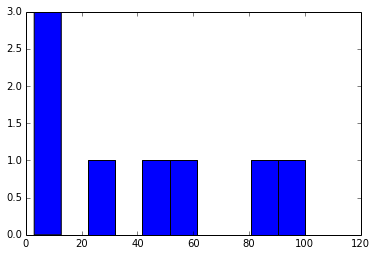

In [53]:
# Let's see how it looks
plt.hist(original_sample)

So even though it's not normally distributed in our sample, maybe we know it is in real life, so let's resample?

In [54]:
# Generate our new sample
mean = np.mean(original_samples)
std_dev = np.std(original_samples)
sample_size = 1000
# np.random.normal generates a sample based on a mean and a standard deviation
sample = np.random.normal(mean, std_dev, sample_size)

In [27]:
len(sample)

1000

In [29]:
# Look at a few of our sample ([:20] gives us twenty)
sample[:20]

array([ -24.87255333,   41.7598475 ,    5.9636103 ,   -5.614539  ,
        -39.10385445,   29.49316986,  -13.62908645,   36.77346158,
         51.4799241 ,  164.57452099,   53.73965778,   19.66770603,
         73.70718605,  -23.80111388,    9.31857328,   22.73636417,
         21.36674226,   18.07400789,    2.32946523,   30.76596535])

(array([  10.,   56.,  105.,  212.,  266.,  200.,   94.,   40.,   15.,    2.]),
 array([ -62.60530029,  -39.68998665,  -16.77467302,    6.14064062,
          29.05595425,   51.97126789,   74.88658153,   97.80189516,
         120.7172088 ,  143.63252243,  166.54783607]),
 <a list of 10 Patch objects>)

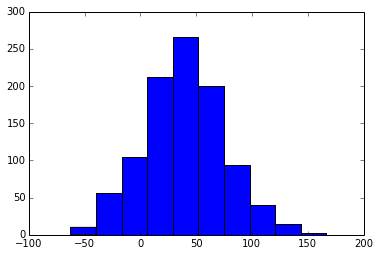

In [35]:
# Let's make a histogram to see how it showed up
plt.hist(sample)

Tada!

But in reality if there's a known distribution, you won't be taking it from a sample, you'll just be saying "Hey, I have a mean of 5 and a standard deviation 0.2, and I need thirty samples"

In [55]:
sample = np.random.normal(5, 0.2, 30)

In [56]:
sample

array([ 5.24314055,  5.02330641,  4.7884817 ,  5.13597072,  4.95622537,
        4.69507699,  5.42556452,  5.09381934,  5.31541795,  5.03493599,
        5.63990685,  5.16841451,  5.05427111,  5.02954113,  4.83911873,
        5.10781502,  5.4504629 ,  5.06318094,  5.06385781,  4.98002334,
        4.90083059,  5.03833949,  4.91281501,  5.0767428 ,  5.17218578,
        5.08865432,  5.15793256,  5.17757981,  5.31057024,  5.12845602])

(array([ 2.,  1.,  3.,  8.,  7.,  4.,  2.,  2.,  0.,  1.]),
 array([ 4.69507699,  4.78955998,  4.88404296,  4.97852595,  5.07300894,
         5.16749192,  5.26197491,  5.35645789,  5.45094088,  5.54542387,
         5.63990685]),
 <a list of 10 Patch objects>)

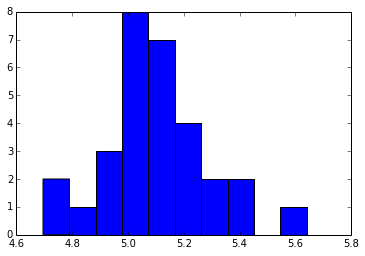

In [57]:
plt.hist(sample)

# Bootstrapping

So for your homework, you'll be taking the sample from a known standard deviation and known mean and then resampling from there, to make a much bigger sample! This is some code from http://adorio-research.org/wordpress/?p=9048 that I've tweaked slightly

In [58]:
import scipy.stats as stat
def mean(X):
    return sum(X)/ float(len(X))
 
def bootstrap(sample, samplesize = None, nsamples = 1000, statfunc = mean):
    """
    Arguments:
       sample - input sample of values
       nsamples - number of samples to generate
       samplesize - sample size of each generated sample
       statfunc- statistical function to apply to each generated sample.
 
    Performs resampling from sample with replacement, gathers
    statistic in a list computed by statfunc on the each generated sample.
    """
    if samplesize is None:                                                                   
        samplesize=len(sample)
    n = len(sample)
    X = []
    for i in range(nsamples):
        resample = [sample[j] for j in stat.randint.rvs(0, n-1, size=samplesize)] 
        x = statfunc(resample)
        X.append(x)
    return X

Basically we want to use the samples we already have, and then feed them to this function along with `nsamples` (the number of samples we want back out) to get a new bunch of samples.

**Note:** See `import scipy` up there? `scipy` is a bunch of scientific Python stuff that you'll use in the second half of the summer in Algorithms. Take note!!

In [59]:
print "Sample length is", len(sample)
print "The samples look like", sample

Sample length is 30
The samples look like [ 5.24314055  5.02330641  4.7884817   5.13597072  4.95622537  4.69507699
  5.42556452  5.09381934  5.31541795  5.03493599  5.63990685  5.16841451
  5.05427111  5.02954113  4.83911873  5.10781502  5.4504629   5.06318094
  5.06385781  4.98002334  4.90083059  5.03833949  4.91281501  5.0767428
  5.17218578  5.08865432  5.15793256  5.17757981  5.31057024  5.12845602]


In [60]:
# Now let's feed them to bootstrap and specify we want 1000 back
bootstrapped = bootstrap(sample, nsamples=1000)

In [61]:
print "The bootstrap has", len(bootstrapped), "elements"
print "The first twenty look like", bootstrapped[:20]

The bootstrap has 1000 elements
The first twenty look like [5.0792950901280935, 5.0733692819648768, 5.1116330626440094, 5.083993149724007, 5.1286307501735449, 5.1046357411782646, 5.032728400670015, 5.0935392130806871, 5.148160290767426, 5.0995357539730275, 5.1240172890559004, 5.0970417501510017, 5.093864326359717, 5.0838171077037781, 5.1171265818250529, 5.0345423423337952, 5.1771247934988294, 5.1041353946325296, 5.0730782368996623, 5.0192276609467079]


(array([  11.,   50.,  139.,  224.,  260.,  175.,   99.,   30.,   10.,    2.]),
 array([ 5.00007863,  5.02328324,  5.04648784,  5.06969244,  5.09289705,
         5.11610165,  5.13930626,  5.16251086,  5.18571547,  5.20892007,
         5.23212468]),
 <a list of 10 Patch objects>)

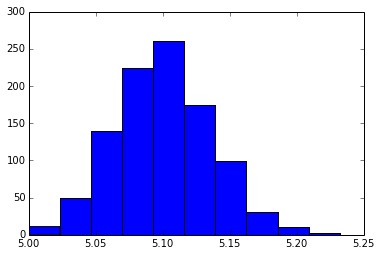

In [62]:
# Now we can use plt.hist to make a histogram
# and additionally do any np.mean np.std_dev kind of 
# numerical analysis stuff that we might find useful.
plt.hist(bootstrapped)